In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
#1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,width*height).astype('float32')/255.0  #우선1차원으로 나눠    #트레인용: 6만개 데이터
x_test = x_test.reshape(10000,width*height).astype('float32')/255.0                           #테스트용: 1만개 데이터

x_val = x_train[50000:]     #,가없어서   여기는 '행'만을 의미   #5만번부터 맨 끝까지
y_val = y_train[50000:]
x_train = x_train[:50000]   # 처음부터 5만번전까지 
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)


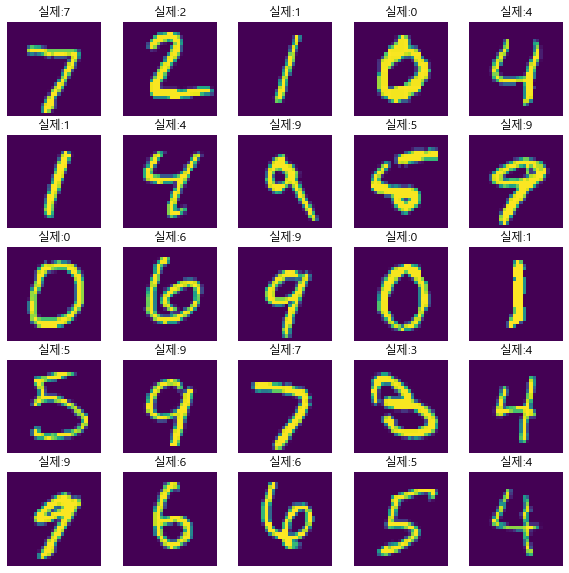

In [11]:
plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)
plt.rc("font", family="Malgun Gothic")
f,axarr=plt.subplots(plt_row,plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col ]#0행4열    # //목   %은 나머지  ************************************
    sub_plt.imshow(x_test[i].reshape(width,height))
    sub_plt.axis("off")       # 축 없앰
    sub_plt.set_title("실제:" + str(np.argmax(y_test[i])) ) # 타이틀 추가
    #axarr[0,0].plot   #0행0열 다 그렸으면 0행1열, 다 그렸으면 0행2열, 0행3열

# DNN (Deep Neural Network)

Epoch 1/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3731 - accuracy: 0.8911 - val_loss: 0.1227 - val_accuracy: 0.9637
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1033 - accuracy: 0.9693 - val_loss: 0.0954 - val_accuracy: 0.9709
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0672 - accuracy: 0.9790 - val_loss: 0.0989 - val_accuracy: 0.9735
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0517 - accuracy: 0.9836 - val_loss: 0.0955 - val_accuracy: 0.9744
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0892 - val_accuracy: 0.9785
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0314 - accuracy: 0.9895 - val_loss: 0.0991 - val_accuracy: 0.9788
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0299 - accuracy: 0.9912 - val_loss: 0.1021 - val_accuracy:

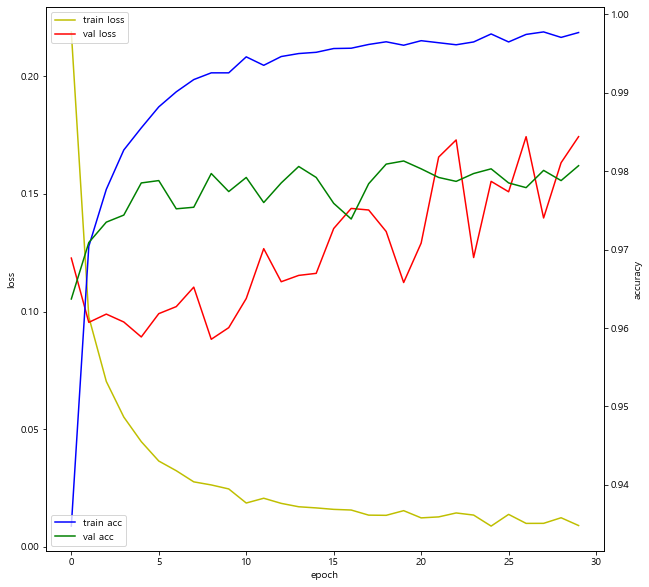

313/313 [==============================] - 0s 964us/step - loss: 0.1924 - accuracy: 0.9772


 loss: 0.19237874448299408 ,metrics["accuracy"] 0.9771999716758728


NameError: name 'y_hat' is not defined

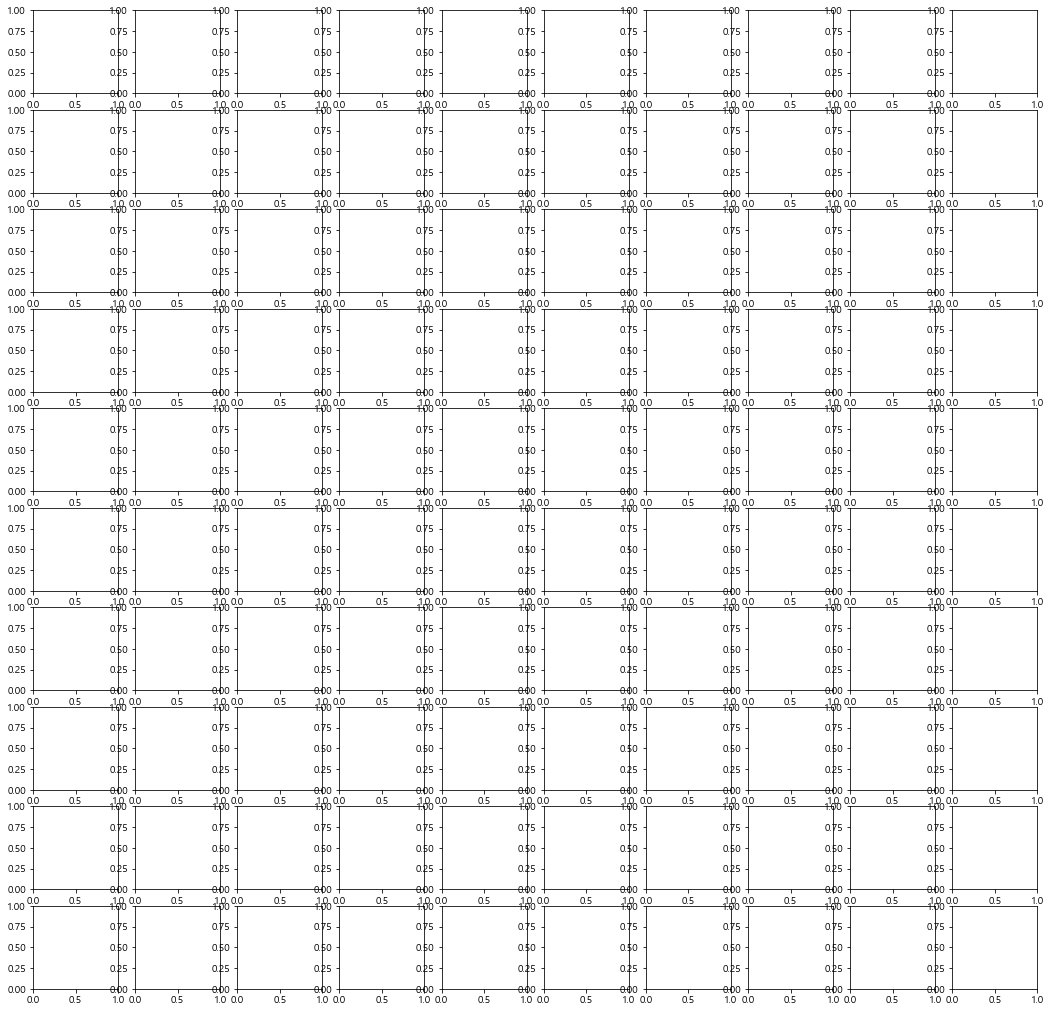

In [15]:
#1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,width*height).astype('float32')/255.0  #우선1차원으로 나눠    #트레인용: 6만개 데이터
x_test = x_test.reshape(10000,width*height).astype('float32')/255.0                           #테스트용: 1만개 데이터

x_val = x_train[50000:]    
y_val = y_train[50000:]
x_train = x_train[:50000] 
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

#2. 모델구성
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

#3.학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

#4. 모델학습시키기 
early_stopping = EarlyStopping(patience=30)
fit_hist = model.fit(x_train, y_train, epochs=30, batch_size=32,validation_data=(x_val,y_val),
                callbacks=[early_stopping])

#5. 학습과정 살펴보기 
fig, loss_ax = plt.subplots()
loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()  # x축공유
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train acc')  #만약에 accuracy가 아니고 recall 이면, 여기안에 recall로 바꿈
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

# 6. 모델 평가하기 
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\n loss:", score[0], ',metrics["accuracy"]',score[1] )


#7. 모델 사용하기 (예측)
yhat = model.predict(x_test, batch_size=32)

plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f,axarr=plt.subplots(plt_row,plt_col)

# *********************틀린 것 그리보기 ***************************
i=0
cnt=0   #25번까지 출력하고 그만
while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(y_hat[i]):       #np.argmax(y_test[i])이 '실제값'      예측값이'np.argmax(y_hat[i])''
        i+=1
        continue
    sub_plt = axarr[i//plt_row, i%plt_col ]  #틀린것 몇개 있는지 . 틀려서 내려왔기때문에 
    sub_plt.imshow(x_test[i].reshape(width,height))
    sub_plt.axis("off")       # 축 없앰
    title = "실제:" + str(np.argmax(y_test[i])) + "예측:" + str(np.argmax(yhat[i]))
    sub_plt.set_title(title) # 타이틀 추가
    i += 1
    cnt +=1



# CNN (Convolution 레이어 --> 깊은 convolution 레이어)

Epoch 1/30
1563/1563 [==============================] - 48s 30ms/step - loss: 0.2951 - accuracy: 0.9076 - val_loss: 0.0589 - val_accuracy: 0.9833
Epoch 2/30
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0524 - accuracy: 0.9836 - val_loss: 0.0482 - val_accuracy: 0.9851
Epoch 3/30
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.0507 - val_accuracy: 0.9849
Epoch 4/30
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0457 - val_accuracy: 0.9876
Epoch 5/30
1563/1563 [==============================] - 46s 29ms/step - loss: 0.0170 - accuracy: 0.9940 - val_loss: 0.0448 - val_accuracy: 0.9877
Epoch 6/30
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0656 - val_accuracy: 0.9861
Epoch 7/30
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0541 -

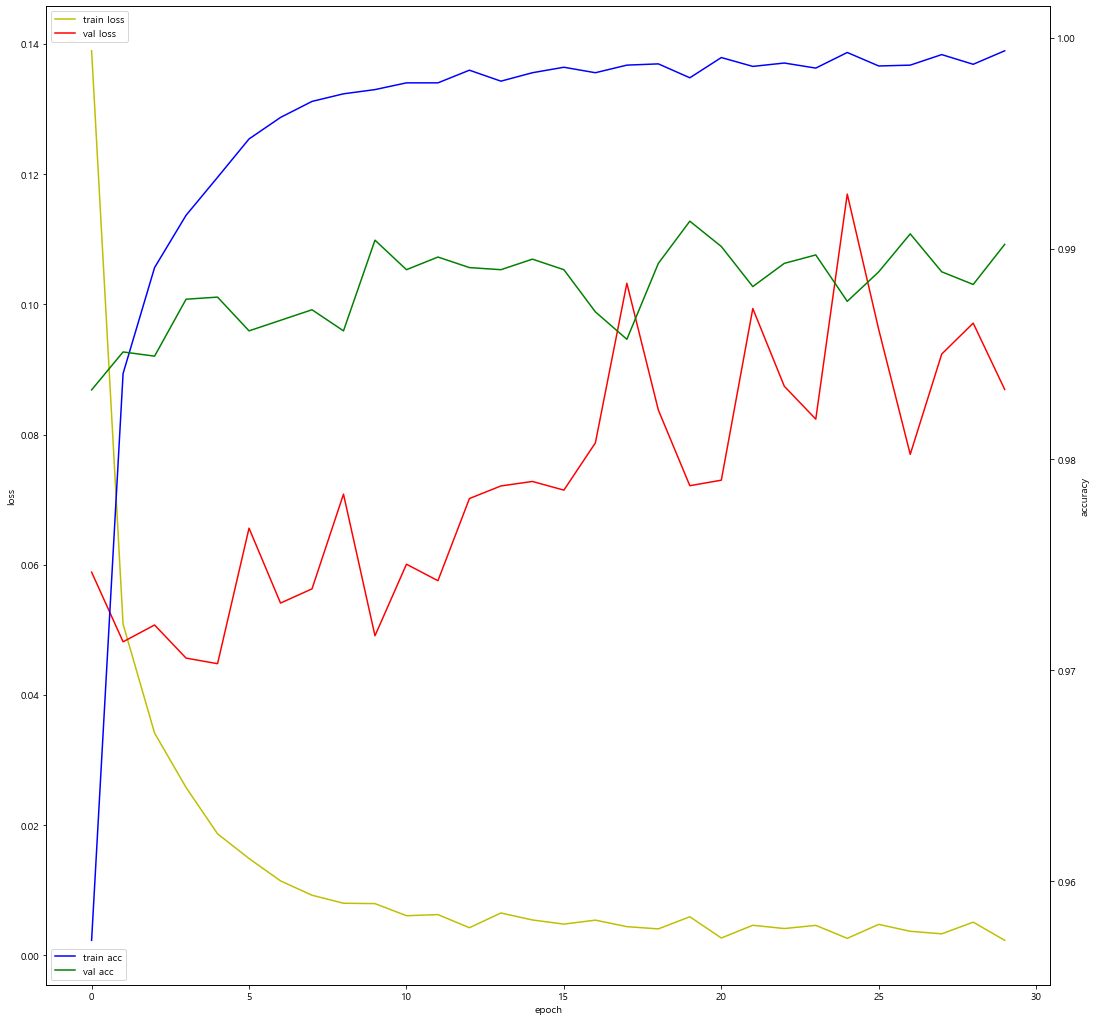

313/313 [==============================] - 2s 7ms/step - loss: 0.0655 - accuracy: 0.9913


 loss: 0.06552186608314514 ,metrics["accuracy"] 0.9912999868392944


NameError: name 'y_hat' is not defined

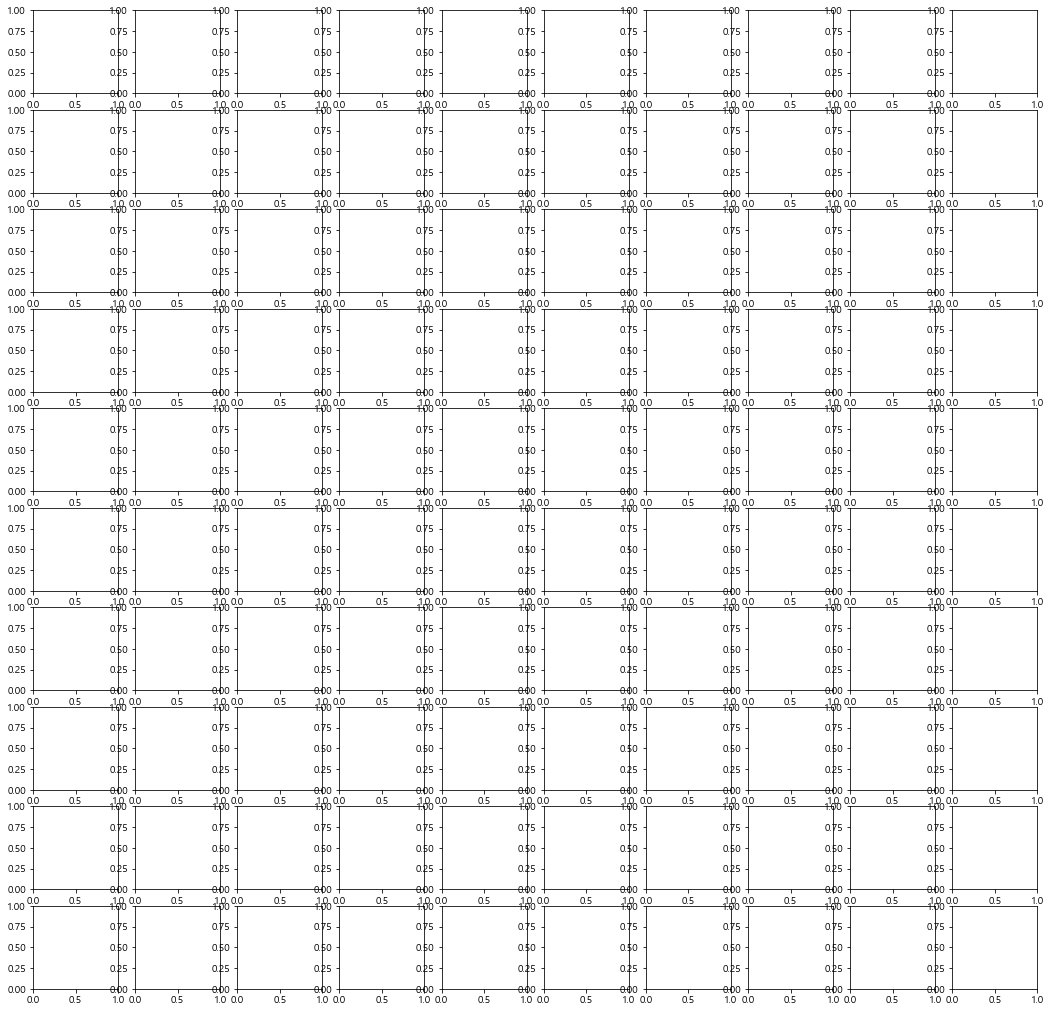

In [17]:
#1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,width, height,1).astype('float32')/255.0  #우선1차원으로 나눠   #3열로 들어옴   따라서 reshape(60000,width,height,1)
                                                                         # 1 넣어서  차원 하나를 늘려줌 앞에 60000개 데이터 갯수 + 3열  ==> 총4열
x_test = x_test.reshape(10000,width, height,1 ).astype('float32')/255.0    #**************수정한 부분********************

x_val = x_train[50000:]    
y_val = y_train[50000:]
x_train = x_train[:50000] 
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

#2. 모델구성
model = Sequential() 
model. add(Conv2D(32,(3,3), activation="relu", input_shape=(width,height,1)))    #**************수정한 부분********************
model.add(MaxPool2D(pool_size=(2,2)))                                             #**************추가한 부분*****************
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(256,input_dim=width*height ,activation="relu"))
model.add(Dense(10, activation="softmax"))

#3.학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

#4. 모델학습시키기 
early_stopping = EarlyStopping(patience=30)
fit_hist = model.fit(x_train, y_train, epochs=30, batch_size=32,validation_data=(x_val,y_val),
                callbacks=[early_stopping])

#5. 학습과정 살펴보기 
fig, loss_ax = plt.subplots()
loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()  # x축공유
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train acc')  #만약에 accuracy가 아니고 recall 이면, 여기안에 recall로 바꿈
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

# 6. 모델 평가하기 
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\n loss:", score[0], ',metrics["accuracy"]',score[1] )


#7. 모델 사용하기 (예측)
yhat = model.predict(x_test, batch_size=32)

plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f,axarr=plt.subplots(plt_row,plt_col)

# *********************틀린 것 그리보기 ***************************
i=0
cnt=0   #10*10번까지 출력하고 그만   
while (cnt < (plt_row*plt_col)) and (i<len(yhat)): #틀린게 100개가 안되면 계속돔. 이를 방지하기 위해  and (i<len(yhat) 
    if np.argmax(y_test[i]) == np.argmax(y_hat[i]):       #np.argmax(y_test[i])이 '실제값'      예측값이'np.argmax(y_hat[i])''
        i+=1
        continue
    sub_plt = axarr[i//plt_row, i%plt_col ]  #틀린것 몇개 있는지 . 틀려서 내려왔기때문에 
    sub_plt.imshow(x_test[i].reshape(width,height))
    sub_plt.axis("off")       # 축 없앰
    title = "실제:" + str(np.argmax(y_test[i])) + "예측:" + str(np.argmax(yhat[i]))
    sub_plt.set_title(title) # 타이틀 추가
    i += 1
    cnt +=1




-  **보통 아래 것은 4번 실행해야 깊은 convolution라 할 수 있다** 

In [ ]:
#1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,width, height,1).astype('float32')/255.0  #우선1차원으로 나눠   #3열로 들어옴   따라서 reshape(60000,width,height,1)
                                                                         # 1 넣어서  차원 하나를 늘려줌 앞에 60000개 데이터 갯수 + 3열  ==> 총4열
x_test = x_test.reshape(10000,width, height,1 ).astype('float32')/255.0    #**************수정한 부분********************

x_val = x_train[50000:]    
y_val = y_train[50000:]
x_train = x_train[:50000] 
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

#2. 모델구성    *************************이 부분을 바꾸겠다 *************************
model = Sequential() 
model. add(Conv2D(32,(3,3), activation="relu", input_shape=(width,height,1)))    
model. add(Conv2D(32,(3,3), activation="relu", input_shape=(width,height,1))) 
model.add(MaxPool2D(pool_size=(2,2)))                                             
model.add(Dropout(0.2))
model. add(Conv2D(64,(3,3), activation="relu"))  #**************추가한 부분*****************
model. add(Conv2D(64,(3,3), activation="relu")) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,input_dim=width*height ,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

#3.학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

#4. 모델학습시키기 
early_stopping = EarlyStopping(patience=30)
fit_hist = model.fit(x_train, y_train, epochs=30, batch_size=32,validation_data=(x_val,y_val),
                callbacks=[early_stopping])

#5. 학습과정 살펴보기 
fig, loss_ax = plt.subplots()
loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()  # x축공유
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train acc')  #만약에 accuracy가 아니고 recall 이면, 여기안에 recall로 바꿈
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

# 6. 모델 평가하기 
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\n loss:", score[0], ',metrics["accuracy"]',score[1] )


#7. 모델 사용하기 (예측)
yhat = model.predict(x_test, batch_size=32)

plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f,axarr=plt.subplots(plt_row,plt_col)

# *********************틀린 것 그리보기 ***************************
i=0
cnt=0   #10*10번까지 출력하고 그만   
while (cnt < (plt_row*plt_col)) and (i<len(yhat)): #틀린게 100개가 안되면 계속돔. 이를 방지하기 위해  and (i<len(yhat) 
    if np.argmax(y_test[i]) == np.argmax(y_hat[i]):       #np.argmax(y_test[i])이 '실제값'      예측값이'np.argmax(y_hat[i])''
        i+=1
        continue
    sub_plt = axarr[i//plt_row, i%plt_col ]  #틀린것 몇개 있는지 . 틀려서 내려왔기때문에 
    sub_plt.imshow(x_test[i].reshape(width,height))
    sub_plt.axis("off")       # 축 없앰
    title = "실제:" + str(np.argmax(y_test[i])) + "예측:" + str(np.argmax(yhat[i]))
    sub_plt.set_title(title) # 타이틀 추가
    i += 1
    cnt +=1


